# 2. 필요한 라이브러리 가져오기

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

In [21]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [22]:
from lightgbm import LGBMClassifier

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
from sklearn import set_config
set_config(print_changed_only = False)

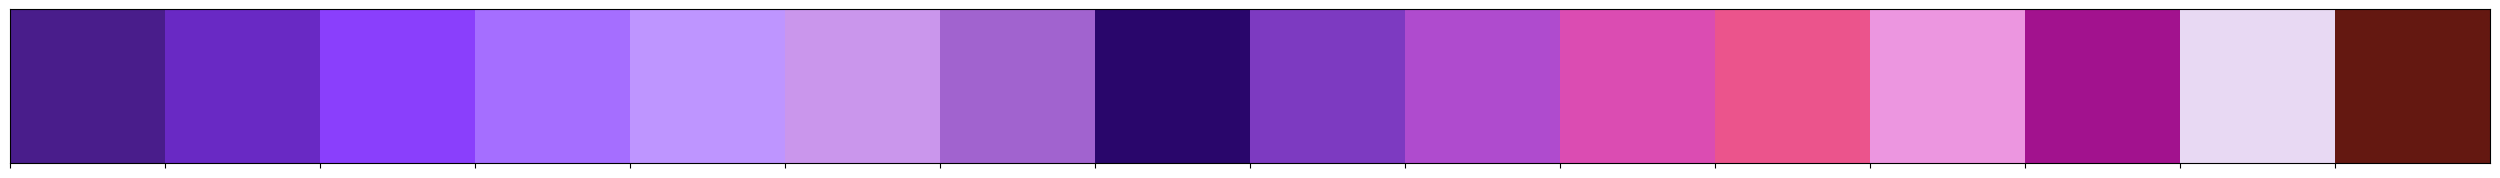

In [25]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

# 3. 데이터셋 로드

In [26]:
wine = pd.read_csv('./winequality-red.csv')
df = wine.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# 이름 변경
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
# 결측치가 0이다.
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


# - 와인 데이터를 사용하여 KNN 수행하는 과정

# 1) 데이터 불러오기
- Kaggle에서 제공하는 와인 데이터를 불러옵니다.

# 2) 결측치 처리: 
- 데이터셋에서 결측치가 있는지 확인하고 있다면 적절한 방법으로 처리합니다. 일반적인 방법은 해당 열의 평균값, 중앙값 또는 다른 통계치로 대체하는 것입니다.
- 이미 레드와인 데이터셋은 결측치가 0임을 확인함. 그래서 더 추가로 할 필요가 없음. 

# 3) 이상치 처리: 
- 이상치를 확인하고 필요한 경우 이상치를 다루는 방법을 고려합니다. 예를 들어, Z-score나 IQR을 사용하여 이상치를 식별하고 제거하거나 대체할 수 있습니다.

# 3.1) 이상치 처리 방법:
- (1) 시각화를 통한 이상치 탐지: 산점도 행렬, 상자 그림, 히트맵 등을 사용하여 데이터의 분포를 시각적으로 확인하고 이상치를 탐지할 수 있다.
- (2) Z-Score를 이용한 이상치 식별: Z-Score를 계산하여 특정 임계값을 기준으로 Z-Score가 넘어가는 데이터를 이상치로 간주한다.
- (3) IQR을 이용한 이상치 식별: 사분위 범위(IQR)를 계산하여 이를 이용하여 이상치를 식별한다.

# 4) 데이터 탐색: 
- 데이터셋의 기초 통계 및 시각화를 사용하여 데이터의 분포를 살펴봅니다. 이는 이상한 패턴이나 데이터의 특이점을 확인하는 데 도움이 됩니다.
- EDA


# 5) 범주형 변수 처리: 
- 데이터에 범주형 변수가 있다면 원-핫 인코딩 또는 레이블 인코딩과 같은 방법을 사용하여 수치형 변수로 변환합니다.
- 레드 와인 데이터셋은 연속형 변수(숫자로 측정되며 연속적인 값을 가짐.알콜, 산도, 밀도 등) 이므로 범주형 변수 처리 할 필요 없음.



# 6) 데이터 표준화 또는 정규화: 
- 데이터의 스케일이 서로 다르면 알고리즘 성능에 영향을 줄 수 있습니다. 따라서 특성 스케일을 조정하기 위해 표준화 또는 정규화를 수행합니다.


# 7) 데이터 분할: 
- 전체 데이터셋을 학습 데이터셋과 테스트 데이터셋으로 나눕니다.


# 8) KNN 모델 적용: 
- 전처리된 데이터에 KNN 알고리즘을 적용하여 모델을 학습하고 평가합니다.

# #gpt로 하나씩 해봄(아래)

# 3)이상치 처리

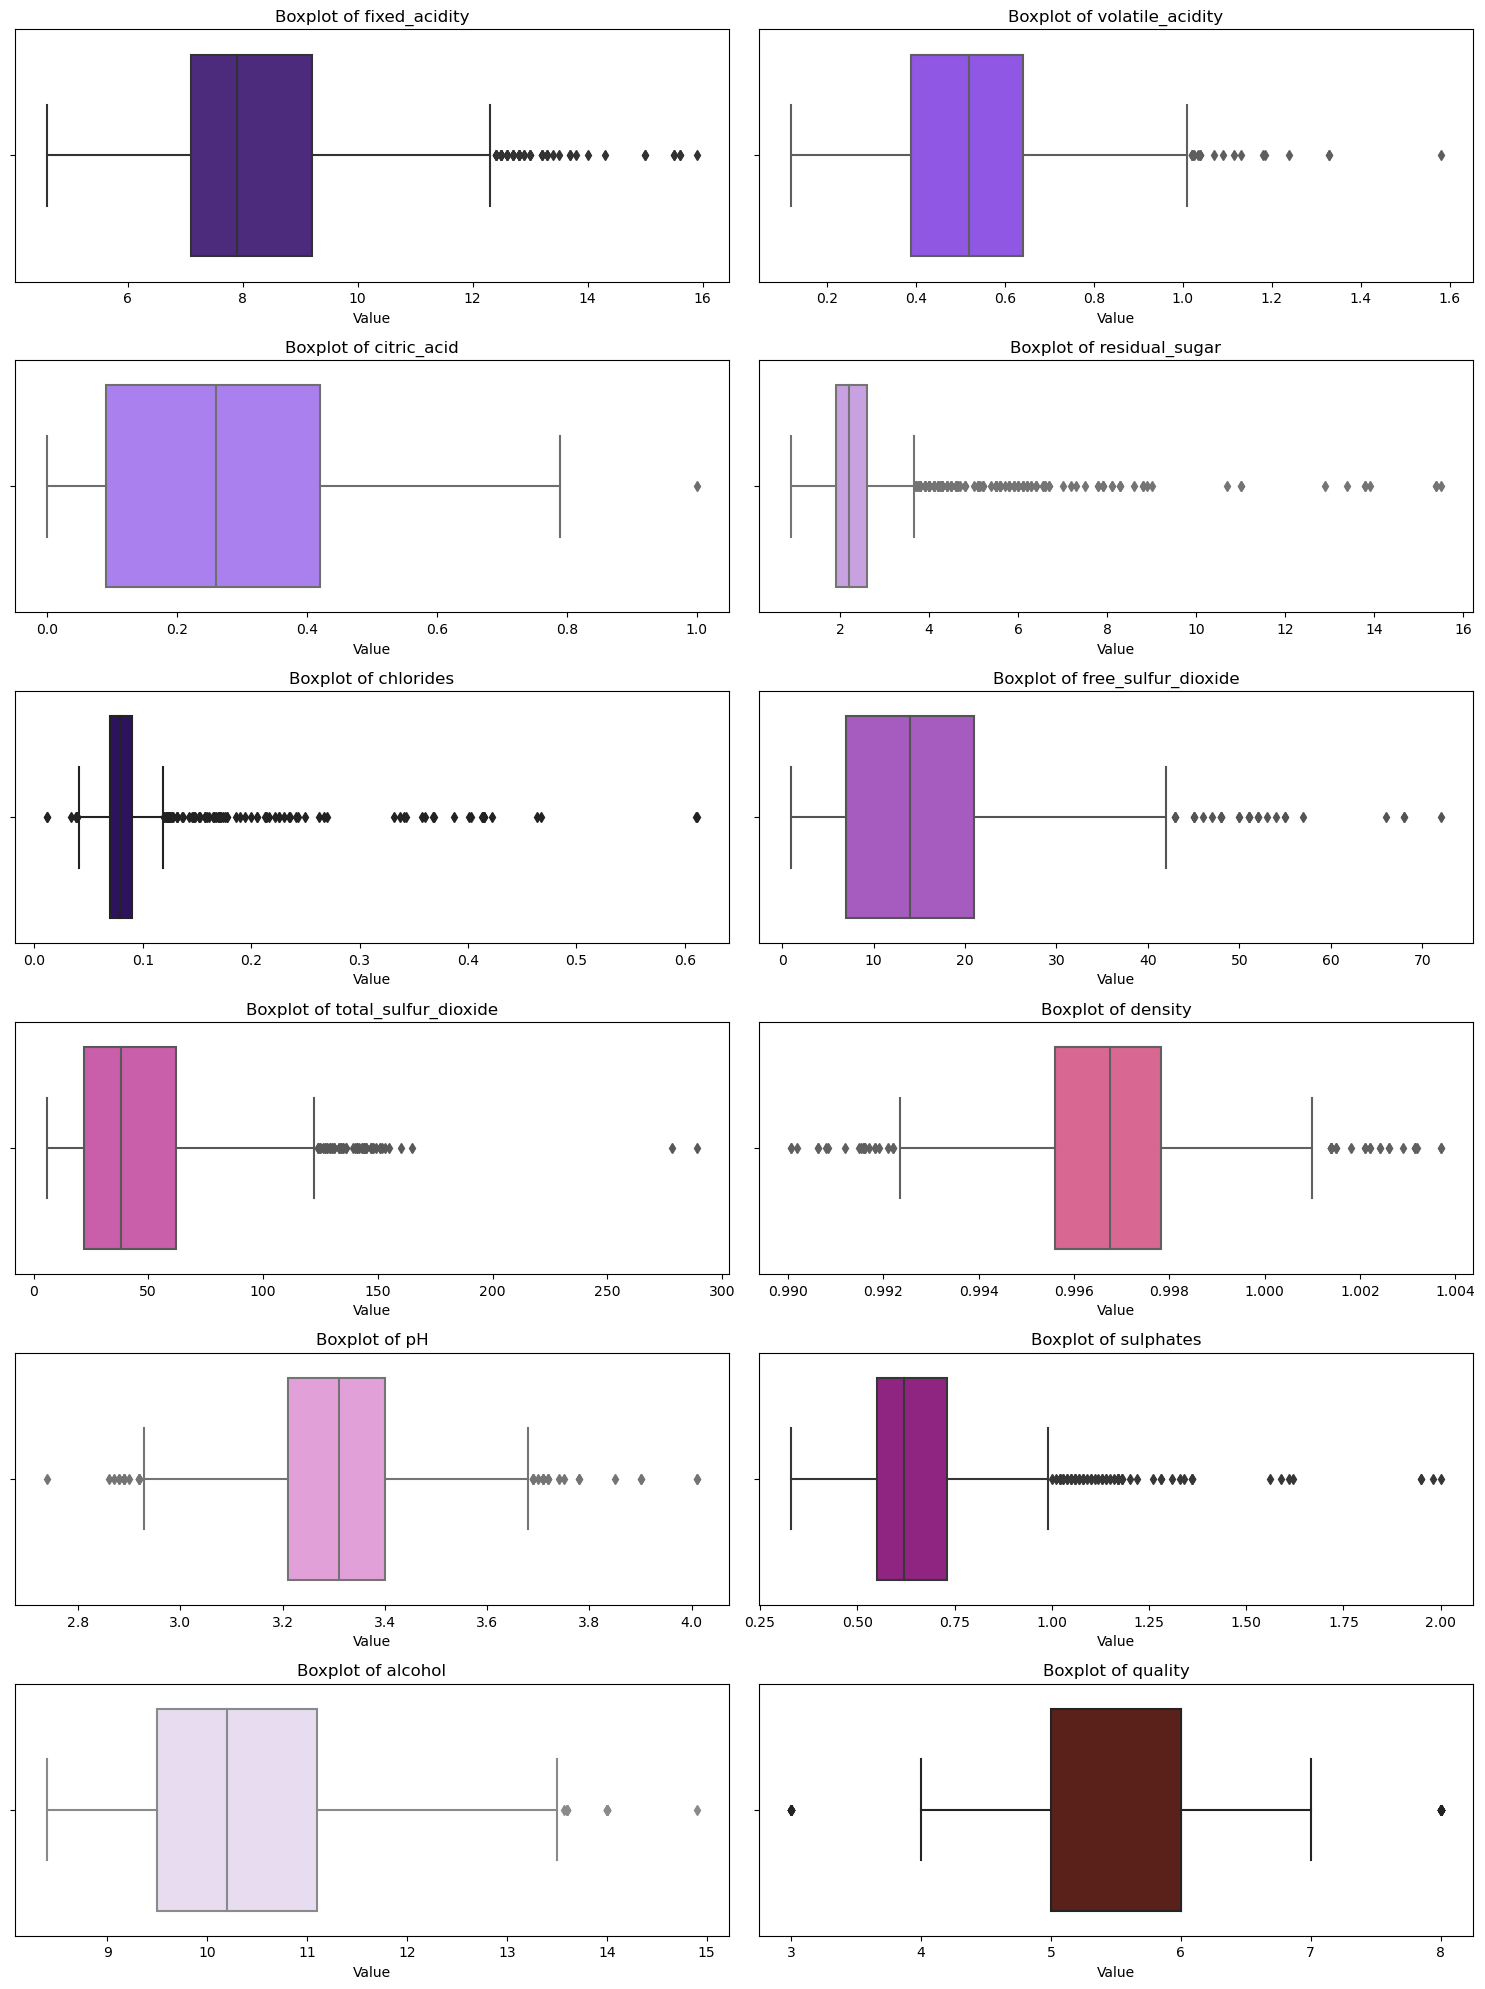

In [29]:
# 상자 그림을 통해 이상치 확인

import seaborn as sns
import matplotlib.pyplot as plt
import math
# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

# 서로 다른 색상 직접 지정
colors = ['#491D8B', '#8A3FFC', '#A56EFF', '#CA96EC', '#29066B', '#AF4BCE', 
          '#DB4CB2', '#EB548C', '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 boxplot을 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df[column], ax=axes[row_index, col_index], color=colors[i % len(colors)])  # 색상 코드 직접 지정
    axes[row_index, col_index].set_title(f'Boxplot of {column}')
    axes[row_index, col_index].set_xlabel('Value')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


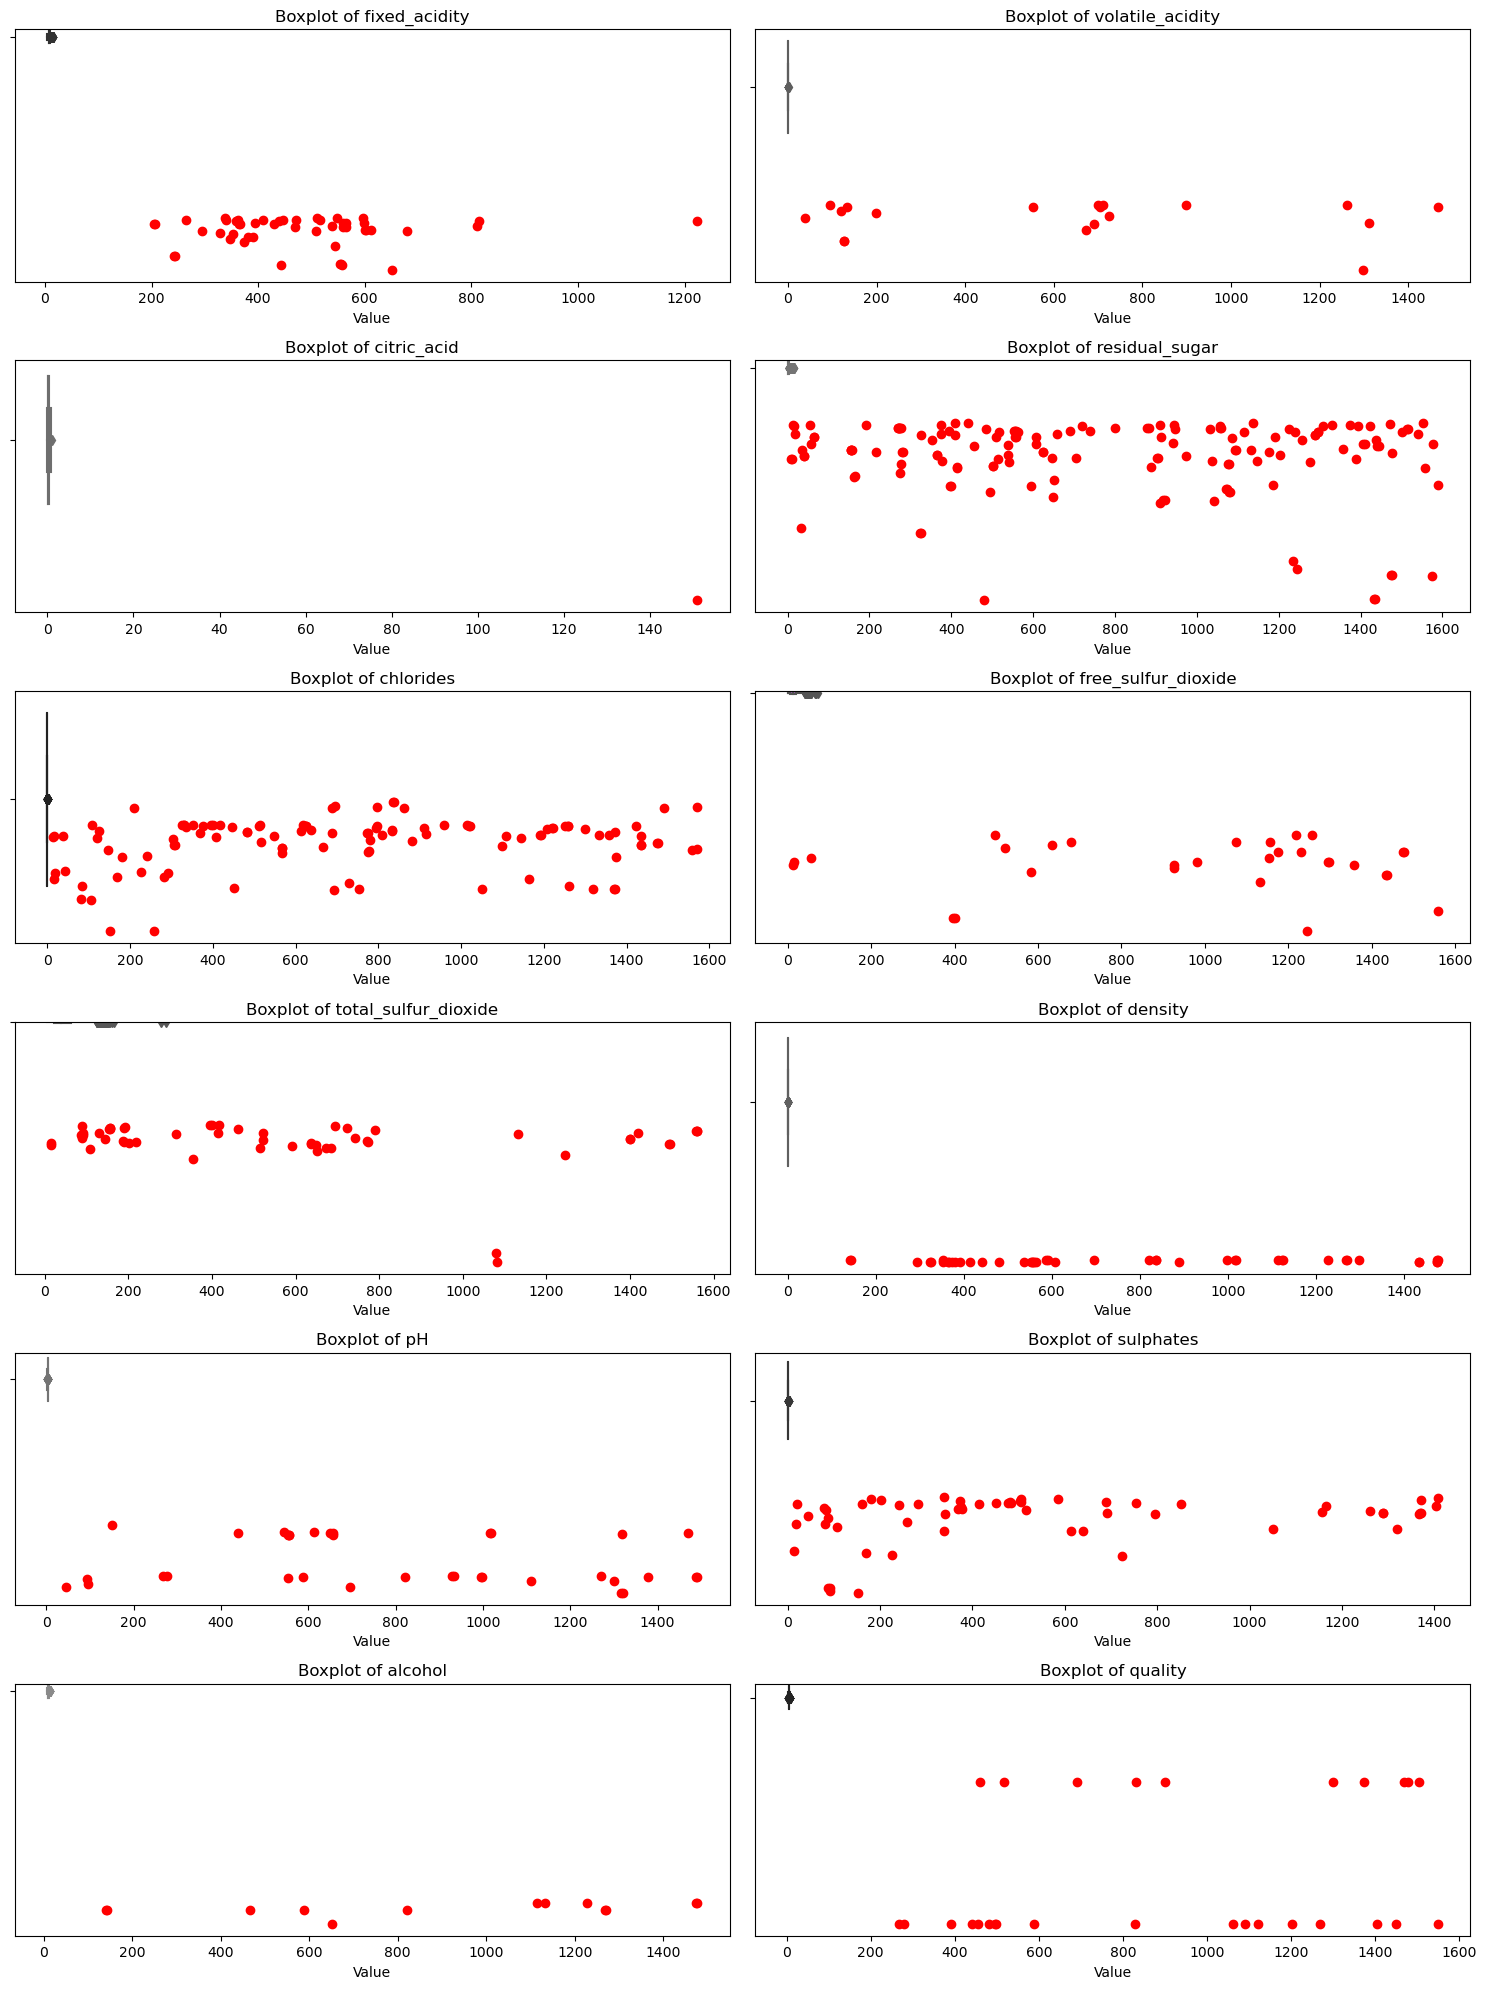

In [33]:
# 상자 그림에서 이상치 확인

import pandas as pd

# 이상치 확인 함수
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# 상자 그림에서 이상치 확인
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

# 서로 다른 색상 직접 지정
colors = ['#491D8B', '#8A3FFC', '#A56EFF', '#CA96EC', '#29066B', '#AF4BCE', 
          '#DB4CB2', '#EB548C', '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 boxplot을 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df[column], ax=axes[row_index, col_index], color=colors[i % len(colors)])  # 색상 코드 직접 지정
    axes[row_index, col_index].set_title(f'Boxplot of {column}')
    axes[row_index, col_index].set_xlabel('Value')

    # 이상치 확인
    outliers = df[column][detect_outliers(df[column])]
    axes[row_index, col_index].scatter(outliers.index, outliers, color='red', label='Outliers')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [34]:
# 이상치 개수 확인

# 이상치 개수를 저장할 데이터프레임 생성
outlier_counts_df = pd.DataFrame(index=df.columns, columns=['Outlier Count'])

# 각 변수에 대해 이상치 개수 계산
for column in df.columns:
    outliers = detect_outliers(df[column])
    outlier_count = outliers.sum()
    
    # 결과 저장
    outlier_counts_df.loc[column] = outlier_count

# 결과 출력
print("Number of outliers in each column:")
print(outlier_counts_df)


Number of outliers in each column:
                     Outlier Count
fixed_acidity                   49
volatile_acidity                19
citric_acid                      1
residual_sugar                 155
chlorides                      112
free_sulfur_dioxide             30
total_sulfur_dioxide            55
density                         45
pH                              35
sulphates                       59
alcohol                         13
quality                         28


<결과 해석>
fixed_acidity: 49개의 이상치
volatile_acidity: 19개의 이상치
citric_acid: 1개의 이상치
residual_sugar: 155개의 이상치
chlorides: 112개의 이상치
free_sulfur_dioxide: 30개의 이상치
total_sulfur_dioxide: 55개의 이상치
density: 45개의 이상치
pH: 35개의 이상치
sulphates: 59개의 이상치
alcohol: 13개의 이상치
quality: 28개의 이상치

- 이상치 개수가 높은 변수는 해당 변수의 값이 다른 값들과 크게 벗어난 경우가 많다는 것을 나타냅니다. 따라서 모델을 학습시키기 전에 이상치에 대한 처리를 고려해볼 필요가 있습니다. 예를 들어, 이상치를 제거하거나 대체할 수 있습니다.

In [35]:
# 이상치 처리 (IQR을 이용해서 이상치 식별)

# 이상치를 제거할 열 선택 (예: fixed_acidity)
column_name = 'fixed_acidity'

# IQR 계산
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]


In [36]:
# 이상치 처리후 변화 확인

# 이상치를 제거하기 전 데이터프레임 확인
print("Shape before removing outliers:", df.shape)

# 각 변수에 대해 이상치 제거 후의 통계적 정보 확인
for column_name in df.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 제거된 데이터프레임
    outliers_removed_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # 결과 출력
    print(f"\nOutliers removed in '{column_name}':")
    print(outliers_removed_df[column_name].describe())

# 이상치를 제거한 후 데이터프레임 확인
print("\nShape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (1599, 12)

Outliers removed in 'fixed_acidity':
count    1550.000000
mean        8.162581
std         1.513582
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        12.300000
Name: fixed_acidity, dtype: float64

Outliers removed in 'volatile_acidity':
count    1580.000000
mean        0.520554
std         0.166581
min         0.120000
25%         0.390000
50%         0.520000
75%         0.630000
max         1.010000
Name: volatile_acidity, dtype: float64

Outliers removed in 'citric_acid':
count    1598.000000
mean        0.270519
std         0.194006
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         0.790000
Name: citric_acid, dtype: float64

Outliers removed in 'residual_sugar':
count    1444.000000
mean        2.179848
std         0.449141
min         0.900000
25%         1.900000
50%         2.100000
75%         2.500000
max         3.650000
Name: residual_sugar, 

<코딩 이유>
- 이상치 처리후 변수들이 어떻게 변했는지 알고 싶었음.

<결과 해석> - ex)fixed acidity
1. Shape before removing outliers: 처음에는 1599개의 행과 12개의 열이 있었으며, 모든 데이터를 포함한 원본 데이터프레임의 크기입니다.

2. Shape after removing outliers: 이상치를 제거한 후에는 1550개의 행과 12개의 열이 남았습니다.
- 원래 1599개였는데 이상치 49개를 제거해서 1550개가 남음

3. Outliers removed in 'fixed_acidity': 'fixed_acidity' 열에 대한 이상치를 제거한 결과를 보여줍니다.
- count: 이상치가 제거된 후의 데이터 개수입니다.
- mean: 이상치가 제거된 후의 'fixed_acidity' 열의 평균 값입니다.
- std: 이상치가 제거된 후의 'fixed_acidity' 열의 표준 편차입니다.
- min: 이상치가 제거된 후의 'fixed_acidity' 열에서의 최솟값입니다.
- 25%, 50%, 75%: 각각 제거된 후의 'fixed_acidity' 열의 25번째 백분위수, 중앙값(50번째 백분위수), 75번째 백분위수입니다.
- max: 이상치가 제거된 후의 'fixed_acidity' 열에서의 최댓값입니다.
- 이 결과를 통해 이상치를 제거한 후의 'fixed_acidity' 열이 어떻게 변했는지에 대한 통계적인 정보를 확인할 수 있습니다.


# 4) EDA

- 통합본 참고

# 6) 데이터 표준화(Standardization)

- 레드와인 데이터셋을 표준화하기 위해서는 주로 Z-score 표준화를 사용함.
- Z-score은 각 값이 평균에서 얼마나 떨어져 있는지를 나타내는 통계적 측도임.
- 아래 코드가 Z-score
- 이 코드를 사용하면 데이터셋의 모든 특성이 Z-score 표준화되어 평균이 0, 표준편차가 1이 되도록 조정됩니다.

<데이터 표준화를 하지 않을 경우>
- 각 특성의 스케일이 다르기 때문에 알고리즘 성능에 부정적인 영향을 미칠 수 있습니다.
- 표준화는 각 특성의 평균을 0으로, 표준 편차를 1로 만들어주는 과정이며, 이를 통해 데이터의 분포를 표준 정규분포에 가깝게 만듭니다.

- 결론: 표준화를 수행하지 않으면 각 특성 간의 스케일 차이가 크게 나타날 수 있습니다. 일부 특성이 다른 특성에 비해 훨씬 큰 값을 가지면, 해당 특성이 모델의 학습에 지배적인 역할을 할 수 있습니다. 이는 모델이 일부 특성에 민감하게 반응하고 다른 특성은 무시하는 결과를 낳을 수 있습니다. 이러한 이슈를 방지하기 위해 데이터 표준화를 수행합니다.

In [39]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 모든 열에 대해 표준화 수행
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

# 표준화된 데이터 확인
print(df_standardized.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  
0 -0.960246 -0.787823  
1 -0.584

<코드 해석>
-'fixed_acidity': 열의 첫 번째 값은 -0.528360입니다. 이는 'fixed_acidity' 특성이 해당 열의 평균에서 약 0.53 표준편차만큼 낮다는 것을 의미합니다. 마찬가지로 각 열에 대한 Z-score를 해석할 수 있습니다.
- 'pH': 열의 Z-score는 1.288643입니다. 이 값은 'pH' 특성이 해당 열의 평균에서 약 1.29 표준편차만큼 높다는 것을 나타냅니다. Z-score가 양수이므로 'pH' 값은 평균보다 큽니다. 따라서 해당 와인 샘플의 pH는 데이터셋의 다른 샘플보다 좀 더 높은 수준으로 나타납니다.

# 6) 데이터 정규화

- 정규화는 데이터를 특정 범위로 조절하여 스케일을 조절하는 프로세스
- 즉, 정규화된 데이터는 각 특성의 상대적인 중요성을 더 잘 이해하고 모델이 더 잘 수렴하도록 도움.
- 일반적으로 정규화는 데이터를 [0, 1] 범위로 조절하는데, Min-Max Scaling
- 아래는 Min-Max Scaling을 사용하여 데이터를 정규화하는 코드

<정규화 하지 않았을때>
- 정규화를 수행하지 않으면 각 열의 값이 그대로 유지되며, 스케일이 서로 다른 특성 간에는 비교가 어려울 수 있음
- 일부 머신러닝 알고리즘은 특성 간의 스케일 차이에 민감하게 반응하여, 정규화를 통해 특성들을 일정한 범위로 조절하는 것이 모델 성능 향상에 도움이 될 수 있다.

- 결론: 정규화를 하지 않을 경우, 어떤 특성은 큰 값을 가지고 있을 수 있고, 다른 특성은 작은 값을 가지는 등의 상황이 발생할 수 있습니다. 이로 인해 학습 알고리즘이 특정 특성에 더 민감하게 반응할 수 있으며, 이는 모델의 성능을 저하시킬 수 있습니다. 정규화를 통해 특성의 값들을 일정한 범위로 조절하면, 모델이 특성들 간의 상대적인 중요성을 더 잘 이해할 수 있게 됩니다.


In [40]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 모든 열에 대해 정규화 수행
df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# 정규화된 데이터 확인
print(df_normalized.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

<결과 해석>
- fixed_acidity 열의 값이 0.247788로 표시되었습니다. 이는 해당 열의 최소값과 최대값을 기준으로 특성 값이 0에서 1 사이의 범위에 속한다는 것을 의미


# 7) 데이터 분할

- 데이터를 분할하는 것은 주로 학습 데이터와 테스트 데이터로 나누는 과정
- 이를 통해 모델을 학습하고 나서 모델의 성능을 평가할 수 있습니다.
- 아래는 데이터를 학습 데이터와 테스트 데이터로 분할하는 간단한 코드입니다.

In [41]:
from sklearn.model_selection import train_test_split

# Features (독립 변수)와 Target (종속 변수)로 데이터를 나눕니다.
X = df_standardized.drop('quality', axis=1)  # 'quality' 열을 제외한 나머지 열은 Features
y = df_standardized['quality']  # 'quality' 열은 Target

# 학습 데이터와 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 나눈 데이터의 크기 확인
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1279, 11) (1279,)
Test set shape: (320, 11) (320,)


<코드 해석>
- test_size는 테스트 데이터의 비율을 나타냅니다. 일반적으로 0.2 또는 0.3 정도로 설정하는 것이 일반적입니다. 
- random_state는 데이터를 나눌 때 발생하는 난수를 고정하기 위한 값으로, 동일한 데이터셋에서 항상 같은 분할을 얻기 위해 사용됩니다.이는 실험의 재현성을 확보하고 코드 실행 결과의 일관성을 유지하는 데 도움이 됩니다.특히 데이터를 학습 및 테스트 세트로 분할할 때 random_state를 고정하면 같은 데이터셋을 얻을 수 있습니다.
-  random_state를 42로 설정한 이유: 숫자 42는 임의로 선택된 것이 아니라, "은하수를 근거로 한 우주인들의 뜻 깊은 수"나 "인생, 우주, 그리고 모든 것에 대한 궁극적인 해답" 등의 의미를 지닌 숫자로 알려져 있어, 개발자들 사이에서 재미로 사용되곤 합니다.

<결과 해석>
* Training set shape: (1279, 11) (1279,):
- 학습 세트는 총 1279개의 샘플이 있고 각 샘플은 11개의 특성으로 이루어져 있습니다.
- (1279, 11)은 학습 데이터의 모양(shape)을 나타냅니다.
- (1279,)는 학습 데이터의 레이블(shape)을 나타냅니다. 이 경우, 각 샘플에 대한 정답(레이블)이 있는 것으로 보입니다.

* Test set shape: (320, 11) (320,):
- 테스트 세트는 총 320개의 샘플이 있고 각 샘플은 11개의 특성으로 이루어져 있습니다.
- (320, 11)은 테스트 데이터의 모양(shape)을 나타냅니다.
- (320,)는 테스트 데이터의 레이블(shape)을 나타냅니다. 이 경우, 테스트 데이터의 샘플에 대한 정답(레이블)이 있는 것으로 보입니다.

# +)변수 선택

<변수 선택 이유>
- 변수 선택은 모델의 정확도를 향상시키는 데 도움이 될 수 있음.
- 특히, KNN과 같은 모델에서는 모든 변수를 사용하는 것이 항상 최선이 아닐 수 있음.
- 몇가지 관련이 없거나 중복되는 변수가 있다면 모델의 복잡성이 증가할 뿐만 아니라 예측 성능이 저하될 수 있음

<변수 선택 방법>
- 상관 분석: 변수 간 상관 관계를 확인하고, 서로 강하게 연관된 변수들을 제거합니다.
- 피처 중요도: 모델 학습 후 각 변수의 중요도를 확인하고 중요하지 않은 변수를 제거합니다.
- 재귀적 특성 제거 (Recursive Feature Elimination, RFE): 모델을 반복적으로 학습하고 중요하지 않은 변수를 제거합니다.
- 변수 중요도 기반 선택: 트리 기반 모델에서 변수 중요도를 기반으로 변수를 선택합니다.
- 단일 변수 선택: 각 변수를 개별적으로 모델링하여 중요한 변수를 선택합니다.

<결론>
- 선택한 변수의 수를 줄이면 모델의 복잡성이 감소하고, 훈련 시간이 단축되며, 모델이 새로운 데이터에 대해 더 잘 일반화될 수 있습니다. 그러나 어떤 변수를 선택할지는 데이터와 모델에 따라 다르므로 여러 가지 방법을 시도해보고 최상의 결과를 얻는 것이 중요합니다.

# +.1) 변수 선택 - 피처 중요도

In [43]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 생성
model = RandomForestRegressor(random_state=42)

# 모든 변수를 사용하여 모델 학습
model.fit(X_train, y_train)

# 피처 중요도 확인
feature_importances = model.feature_importances_

# 중요도가 높은 순으로 정렬된 특성의 인덱스 확인
important_indices = feature_importances.argsort()[-4:][::-1]

# 선택된 변수 확인
selected_features = X_train.columns[important_indices]

# 선택된 변수 출력
print("Selected features:", selected_features)



Selected features: Index(['alcohol', 'sulphates', 'volatile_acidity', 'total_sulfur_dioxide'], dtype='object')


<코드 해석>
- 아래 코드는 피처 중요도를 활용하여 변수를 선택해보았음.
- 위 코드에서 RandomForestRegressor를 사용하여 회귀 모델을 만들고, 피처 중요도를 확인하여 변수를 선택합니다. 
- 중요도가 높은 순으로 변수를 선택합니다. 선택된 변수를 확인해보고, 이를 사용하여 모델을 다시 학습할 수 있습니다.

<결과 해석>
- RandomForestRegressor의 피처 중요도는 각 피처가 모델에 얼마나 기여하는지를 나타내는 값입니다. 중요도가 높은 피처일수록 모델의 예측에 큰 영향을 미치는 특성이라고 해석할 수 있습니다.
- 피처 중요도: alcohol', 'sulphates', 'volatile_acidity', 'total_sulfur_dioxide'

# +.1.1) 8)피처 중요도에 따른 KNN

<KNN 측정 방법>
- Euclidean Distance (유클리드 거리): 이미 설명한 대로 두 점 간의 직선 거리를 측정합니다.
- 주의점(Manhattan Distance와 차이점): Euclidean 거리는 각 차원 간의 차이를 제곱하여 계산하므로 작은 차이에 민감하게 반응

- Manhattan Distance (맨하탄 거리 또는 L1 거리): 좌표 간의 각 차원의 차이의 절대값을 모두 더한 값으로 측정합니다.
- 주의점(Euclidean Distance와 차이점):Manhattan 거리는 각 차원 간의 차이의 절대값을 합하여 계산하므로 더 큰 차이에 민감하게 반응합니다.

- Minkowski Distance (민코프스키 거리): 일반화된 거리 측정 방법으로, Euclidean Distance와 Manhattan Distance를 모두 포함합니다. p라는 파라미터를 조절하여 여러 거리 측정 방법을 사용할 수 있습니다. p=2일 때는 Euclidean Distance, p=1일 때는 Manhattan Distance가 됩니다.

- Chebyshev Distance (체비셰프 거리): 두 점 간의 각 차원의 차이 중에서 가장 큰 차이를 측정합니다.

- Hamming Distance (해밍 거리): 주로 범주형 데이터에서 사용되며, 두 문자열 간의 다른 비트의 개수를 세어 거리를 측정합니다.
- 참고: Hamming Distance는 이진 데이터에 대해서만 적용 가능하며, 다른 데이터 유형에는 사용할 수 없습니다. 즉, 데이터가 이진 형태여야 합니다. 


- 그래서 Hamming Distance는 제외한 4개만 거리 측정 해봄.

In [49]:
import numpy as np
from scipy.spatial import distance

# 예제 데이터
point1 = np.array([df['alcohol'][0], df['sulphates'][0], df['volatile_acidity'][0], df['total_sulfur_dioxide'][0]])
point2 = np.array([df['alcohol'][1], df['sulphates'][1], df['volatile_acidity'][1], df['total_sulfur_dioxide'][1]])

# Euclidean 거리 계산 함수
def euclidean_distance_scipy(x1, x2):
    return distance.euclidean(x1, x2)

# Manhattan 거리 계산 함수
def manhattan_distance_scipy(x1, x2):
    return distance.cityblock(x1, x2)

# Minkowski 거리 계산 함수
def minkowski_distance_scipy(x1, x2, p):
    return distance.minkowski(x1, x2, p)

# Chebyshev 거리 계산 함수
def chebyshev_distance_scipy(x1, x2):
    return distance.chebyshev(x1, x2)

# 거리 계산 및 출력
euclidean_dist_scipy = euclidean_distance_scipy(point1, point2)
manhattan_dist_scipy = manhattan_distance_scipy(point1, point2)
minkowski_dist_scipy = minkowski_distance_scipy(point1, point2, 3)
chebyshev_dist_scipy = chebyshev_distance_scipy(point1, point2)

print(f'Euclidean 거리: {euclidean_dist_scipy:.4f}')
print(f'Manhattan 거리: {manhattan_dist_scipy:.4f}')
print(f'Minkowski 거리: {minkowski_dist_scipy:.4f}')
print(f'Chebyshev 거리: {chebyshev_dist_scipy:.4f}')


Euclidean 거리: 1.6311
Manhattan 거리: 3.0927
Minkowski 거리: 1.3454
Chebyshev 거리: 1.0056


In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# KNN 모델 정의
knn_euclidean = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
knn_minkowski = KNeighborsRegressor(n_neighbors=3, metric='minkowski')
knn_chebyshev = KNeighborsRegressor(n_neighbors=3, metric='chebyshev')

# 모델 학습
knn_euclidean.fit(X_train[selected_features], y_train)
knn_manhattan.fit(X_train[selected_features], y_train)
knn_minkowski.fit(X_train[selected_features], y_train)
knn_chebyshev.fit(X_train[selected_features], y_train)

# 예측
y_pred_euclidean = knn_euclidean.predict(X_test[selected_features])
y_pred_manhattan = knn_manhattan.predict(X_test[selected_features])
y_pred_minkowski = knn_minkowski.predict(X_test[selected_features])
y_pred_chebyshev = knn_chebyshev.predict(X_test[selected_features])

# 평균 제곱 오차(Mean Squared Error) 출력
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
mse_minkowski = mean_squared_error(y_test, y_pred_minkowski)
mse_chebyshev = mean_squared_error(y_test, y_pred_chebyshev)

print(f'Mean Squared Error (Euclidean Distance): {mse_euclidean:.4f}')
print(f'Mean Squared Error (Manhattan Distance): {mse_manhattan:.4f}')
print(f'Mean Squared Error (Minkowski Distance): {mse_minkowski:.4f}')
print(f'Mean Squared Error (Chebyshev Distance): {mse_chebyshev:.4f}')


Mean Squared Error (Euclidean Distance): 0.6590
Mean Squared Error (Manhattan Distance): 0.6585
Mean Squared Error (Minkowski Distance): 0.6590
Mean Squared Error (Chebyshev Distance): 0.6745


<코드 해석>
- 위 코드는 KNN 회귀를 수행하고, 각 거리 측정 방법에 대한 평균 제곱 오차(MSE)를 출력합니다.
- 평균 제곱 오차(Mean Squared Error, MSE) 값이 출력되었고, 이 값들은 각각 다른 거리 측정 방법을 사용한 KNN 회귀 모델의 성능을 나타냅니다. 
- 낮은 MSE 값이 모델의 예측 성능이 높음을 의미합니다. 따라서 이 결과를 기반으로 성능을 평가할 수 있습니다.

<결과 해석>
- 여기서는 Manhattan Distance가 가장 낮은 MSE 값을 보여주고 있습니다. 따라서 이 모델에서는 Manhattan Distance를 사용한 것이 성능이 더 좋았다고 해석할 수 있습니다.

# #kaggle 에서 복붙한것(아래)

# 품질 - 2 parts 

- 이 데이터 세트 품질 범위는 3에서 8 사이입니다 품질 범위를 두 부분으로 나누겠습니다:

- 고급 와인: 6 - 8
- 저품질 와인: 3 - 5

In [13]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

<코드 해석>
- np.where(df["quality"] > 5, 1, 0): NumPy의 where 함수를 사용하여 조건에 따라 "quality" 값을 변경합니다. 조건이 True인 경우 1로, False인 경우 0으로 값을 변경합니다. 따라서 "quality" 값이 5보다 큰 경우에는 1로, 5 이하인 경우에는 0으로 변경됩니다.

<결과 해석>
- 최종적으로 "quality" 열은 5보다 큰 경우에는 1로, 5 이하인 경우에는 0으로 변환되었습니다. 이러한 처리는 종종 이진 분류 문제에서 타겟 변수를 생성할 때 사용됩니다. 예를 들어, 와인의 품질이 5보다 크면 좋은 품질(1), 5 이하이면 나쁜 품질(0)으로 분류하는 경우가 있을 수 있습니다.

# 독립변수(11개)와 종속변수(1개) 구분

In [14]:
# we select dependent variable (label)
y = df["quality"]

# we select independent variable
x = df.drop("quality", axis = 1)

# 학습 세트와 테스트 세트로 나누기
- 머신 러닝 모델을 훈련시키고 평가하기 위한 중요한 단계 중 하나
- 일반적으로 데이터는 학습 세트와 테스트 세트로 나눔. 학습 세트를 사용하여 모델을 훈련하고, 테스트 세트를 사용하여 모델의 성능을 평가함. 이를 통해 모데링 학습 데이터에 과적합하지 않았는지를 확인하고 일반화 능력을 평가할 수 있음.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

# Standardization(표준화)
1. 개념
- 변수의 값을 표준 정규 분포로 변환하는 과정을 나타냄. 이는 변수 간의 단위 차이를 제거하고 모델의 성능을 향상시키는 데 도움을 줌. 주로 통계적 모델링이나 머신 러닝 알고리즘에서 사용됨
2. 수행 방법
- 2.1. 표준화: 각 변수의 값을 평균이 0이고 표준 편차가 1일 분포로 변환함.
- 2.2 평균이 0, 표준 편차가 1일 분포: 표준화된 변수는 일반적으로 평균이 0이 되고, 표준 편차가 1이 되므로 특정 변수의 값이 편균에서 얼마나 떨어져 있는지를 측정하는 표준화된 점수로 해석할 수 있음.
- 2.3. 사이킷런을 사용한 표준화: 'StandardScaler를 사용하면 간단하게 표준화를 수행할 수 있습니다.

In [16]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

<코드 해석>
- 이 코드는 데이터를 Min-Max Scaling을 사용하여 정규화하는 과정이다

<Min-Max Scaling>
- Min-Max Scaling은 데이터 범위를 [0,1] 또는 다른 사용자 지정 범위로 변경하여 모든 특성이 동일한 스케일을 갖도록 하는 방법 중 하나이다.
- 이러한 스케일링을 통해 모든 특성이 동일한 스케일을 갖게 되어, 모델 학습과 예측에서 각 특성이 고르게 반영되도록 도움을 줍니다. 

In [17]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]
 [0.36283186 0.44178082 0.22       0.10769231 0.08695652 0.11267606
  0.13235294 0.47629969 0.28346457 0.13173653 0.15384615]
 [0.32743363 0.49657534 0.01       0.1        0.09698997 0.05633803
  0.02941176 0.50688073 0.45669291 0.1497006  0.4       ]]


(1199, 11)
_________________________________________________________________________
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58  

<코드 해석>
- 이 코드를 실행하면 훈련 데이터셋의 처음 5개의 샘플, 그리고 훈련 데이터셋과 테스트 데이터셋의 모양이 출력됩니다. 이를 통해 데이터의 구조와 일부 예시를 확인할 수 있습니다.

<결과 해석>
- Min-Max Scaling 방법으로 정규화한 결과/각 변수의 값들이 0과 1 사이로 변환되었음
- print(x_train[0:5]): 훈련 데이터셋에서 처음 5개의 샘플을 출력합니다. 각 샘플은 11개의 특성(feature)을 가지고 있으며, 각 특성의 값은 0과 1 사이로 정규화되었습니다.
- print(x_train.shape): 훈련 데이터셋의 모양(형태)을 출력합니다. 훈련 데이터셋은 1199개의 샘플과 각각 11개의 특성으로 구성되어 있습니다.
----------------------------------------------------------
- print(x_test[0:5]): 테스트 데이터셋에서 처음 5개의 샘플을 출력합니다. 테스트 데이터셋도 각 샘플의 11개 특성이 0과 1 사이로 정규화되었습니다.
- print(x_test.shape): 테스트 데이터셋의 모양(형태)을 출력합니다. 테스트 데이터셋은 400개의 샘플과 각각 11개의 특성으로 구성되어 있습니다.

In [18]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

1144    0
73      0
446     0
399     0
647     0
Name: quality, dtype: int32
(1199,)
___________________________
75      0
1283    1
408     1
1281    1
1118    1
Name: quality, dtype: int32
(400,)


In [19]:
knn = KNeighborsClassifier()

In [20]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 35]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

<코드 해석>
1. np.arange(2, 50) 
- n_neighbors의 후보 값으로 2부터 49까지의 범위에서 정수를 사용하여 다양한 이웃 수를 실험하고, 이 중에서 어떤 값이 모델의 성능을 가장 향상시키는지 찾아내려는 것입니다.

2. "weights": ["uniform", "distance"]
- weights는 KNN 알고리즘에서 사용되는 가중치 옵션을 나타냅니다. KNN은 이웃 간의 거리를 기반으로 예측을 수행하는데, 가까운 이웃과 먼 이웃에 동일한 영향을 주는지, 아니면 거리에 따라 가중치를 다르게 부여하는지를 결정하는 매개변수
- "uniform": 모든 이웃에 동일한 가중치를 부여합니다. 즉, 가장 가까운 이웃과 가장 먼 이웃이 동일한 영향을 미칩니다.
- "distance": 이웃 간의 거리에 따라 가중치를 부여합니다. 가까운 이웃일수록 더 큰 가중치를 가지며, 먼 이웃일수록 작은 가중치를 부여합니다. 따라서 가장 가까운 이웃이 예측에 더 큰 영향을 미칩니다.
- 결론: weights: "uniform"과 "distance" 두 가지 가중치 옵션을 테스트합니다.

3. "leaf_size": [25, 30, 25]
- K-D 트리를 구성할 때 사용되는 잎(leaf) 노드의 크기를 지정하는 매개변수
-  K-D 트리는 공간 분할을 효율적으로 수행하기 위해 사용되는 데이터 구조 중 하나로, 특히 K-최근접 이웃(KNN) 알고리즘에서 사용
- 잎 노드는 트리의 말단 노드를 나타내며, 잎 노드의 크기는 구성된 트리의 구조에 영향을 줍니다. "leaf_size" 매개변수는 잎 노드의 크기를 지정하는데, 이 값이 작을수록 트리는 더 세분화된 구조를 가지게 되고, 값이 클수록 더 간단한 구조를 가지게 됩니다.

In [26]:
knn_params = {"n_neighbors": np.arange(5, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 35]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'leaf_size': [25, 30, 35],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [22]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='distance')

In [23]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8025

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       188
           1       0.82      0.80      0.81       212

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

